In [1]:
import sys
sys.path.append('/Users/admin/Desktop/tesi/Thesis/')
from skimage.filters import gaussian

from handcrafted_descriptors.descriptor import binary_gabor_features as bgf
import import_ipynb
from handcrafted_descriptors.gabor_classification import utility as utility 

import cv2
import numpy as np 
import os
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# import the necessary packages
from skimage import feature
import numpy as np

importing Jupyter notebook from /Users/admin/Desktop/tesi/Thesis/handcrafted_descriptors/gabor_classification/utility.ipynb


In [2]:
def getDescriptors(img, halflength = 15):
    img_r = img[:,:,0]
    img_g = img[:,:,1]
    img_b = img[:,:,2]   
    feat_1 = bgf.BGF(img_r, 200,200,50, halflngt = halflength, all = True)
    feat_2 = bgf.BGF(img_g, 200,200,50, halflngt = halflength, all = True)
    feat_3 = bgf.BGF(img_b, 200,200,50, halflngt = halflength, all = True)
    res = np.concatenate([feat_1, feat_2, feat_3])
    return res 

In [3]:
def extract_descriptors(path,hlf,train = True):
    images_pth, label_dict = utility.getPath_and_dict(path, train)
    print(len(images_pth))
    descriptor_list = [] 
    train_labels = []
    image_count = len(images_pth) 
    for i,img_path in enumerate(images_pth):
        cl = img_path.split('/')[-2]
        class_index = cl
        train_labels.append(class_index)        
        img = utility.readimage(img_path)
        dsc = getDescriptors(img, halflength = hlf)
        if(i%200==0):
            print(dsc.shape)
        descriptor_list.append(dsc)     
    descriptors =np.array(descriptor_list)
    train_labels = np.array(train_labels)
    return descriptors, train_labels, images_pth

## MAIN ---> BINARY GABOR FEATURE

In [18]:
species = ['Arthonia_radiata','Caloplaca_cerina','Candelariella_reflexa','Candelariella_xanthostigma','Chrysothrix_candelaris','Flavoparmelia_caperata','Gyalolechia_flavorubescens','Hyperphyscia_adglutinata'
        ,'Lecanora_argentata','Lecanora_chlarotera','Lecidella_elaeochroma','Melanelixia_glabratula'
        ,'Phaeophyscia_orbicularis','Physcia_biziana','Physconia_grisea','Ramalina_farinacea','Ramalina_fastigiata','Xanthomendoza_fallax','Xanthomendoza_fulva','flavoparmenia_soredians']


In [28]:
feat,lab,_ = extract_descriptors('../../../data/train', hlf = 19)
feat = feat.reshape((1121,648))
print('end training')
test_feat, test_lab,image_list = extract_descriptors('../../../data/valid', hlf = 19, train = False)
test_feat = test_feat.reshape((456,648))

1121
(648, 1)
(648, 1)
(648, 1)
(648, 1)
(648, 1)
(648, 1)
(648, 1)
(648, 1)
(648, 1)
(648, 1)
(648, 1)
(648, 1)
end training
456
(648, 1)
(648, 1)
(648, 1)
(648, 1)
(648, 1)


In [29]:
svm ,score_rbf = utility.search_for_best_rbf(feat, lab, test_feat, test_lab)

Best estimator found by grid search :  SVC(C=100.0, gamma=1)
Accuracy score : 0.7697368421052632


(0.785287945963226, 0.7780045721187026, 0.764265649825489)

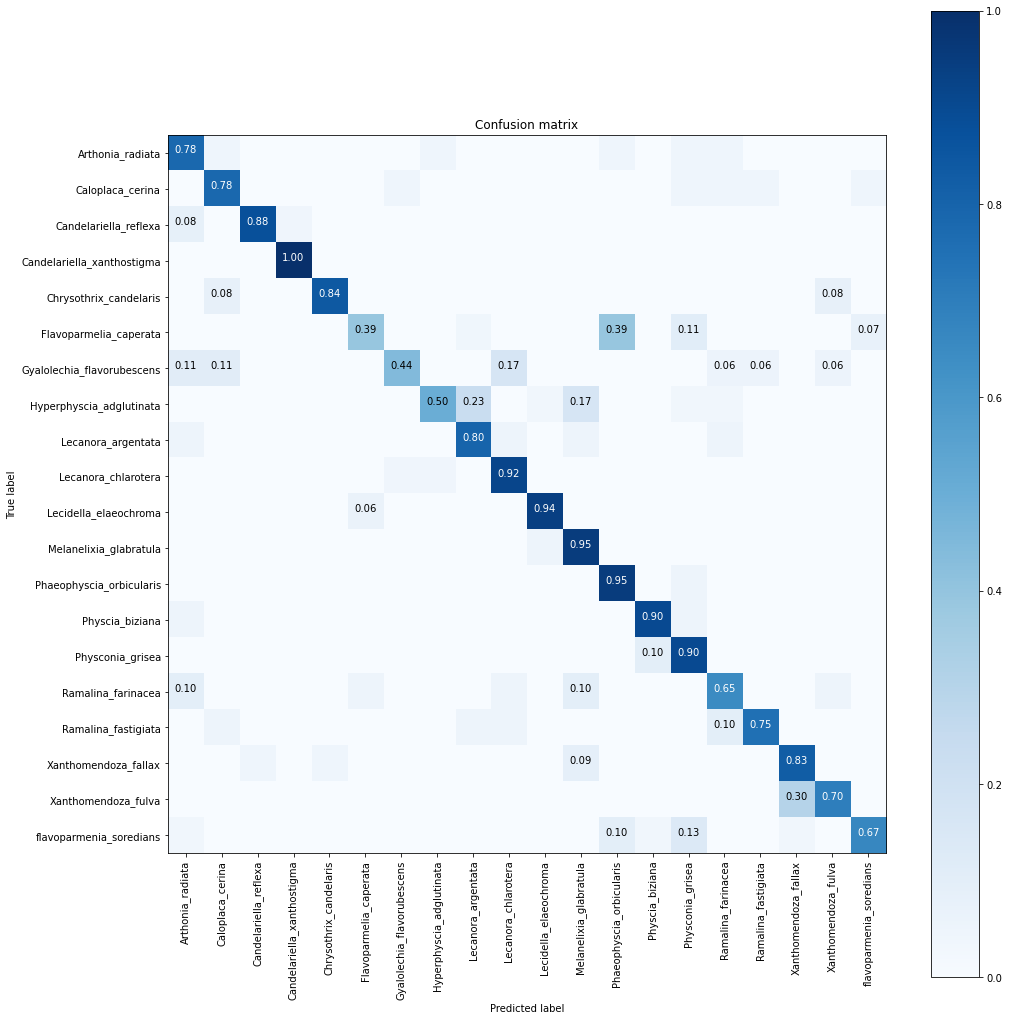

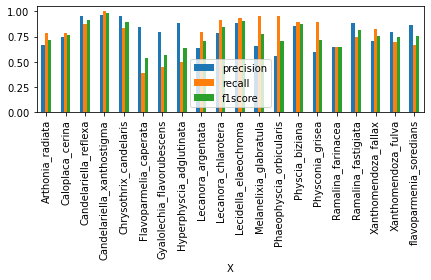

In [30]:
halfln = 19
director_cm = 'results/results_bgp/confusion_matrix/'
name_cm = 'cm_'+ str(halfln)
pred = utility.create_and_save_confusion_matrix(svm, test_feat, test_lab, species, director_cm, name_cm)

director_pra = 'results/results_bgp/pra/'
name_pra = 'pra_' + str(halfln)
utility.calculate_and_plot_precision_recall(test_lab, pred, species, director_pra, name_pra)